<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


/tmp/ipykernel_705/3604236073.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Industry', order=df['Industry'].value_counts().index, palette='viridis')


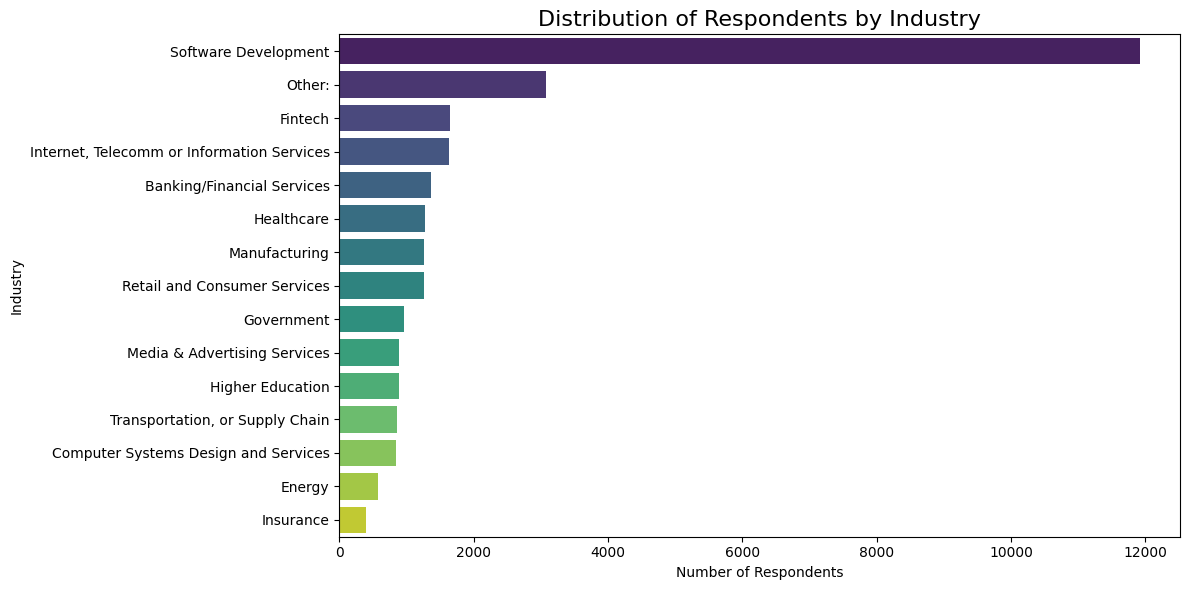

In [3]:
##Write your code here
# Step 3: Plot the distribution of respondents by Industry
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Industry', order=df['Industry'].value_counts().index, palette='viridis')
plt.title("Distribution of Respondents by Industry", fontsize=16)
plt.xlabel("Number of Respondents")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [4]:
##Write your code here
# Step 1: Drop missing values in the compensation column
comp_data = df['ConvertedCompYearly'].dropna()

# Step 2: Calculate basic statistics
mean_comp = comp_data.mean()
median_comp = comp_data.median()
std_comp = comp_data.std()

print(f"Mean: {mean_comp:,.2f}")
print(f"Median: {median_comp:,.2f}")
print(f"Standard Deviation: {std_comp:,.2f}")

# Step 3: Define the outlier threshold
threshold = mean_comp + 3 * std_comp
print(f"Outlier Threshold (Mean + 3*STD): {threshold:,.2f}")

# Step 4: Identify high compensation outliers
outliers = df[df['ConvertedCompYearly'] > threshold]

# Display top 5 outliers
outliers[['ConvertedCompYearly']].sort_values(by='ConvertedCompYearly', ascending=False).head()


Mean: 86,155.29
Median: 65,000.00
Standard Deviation: 186,756.97
Outlier Threshold (Mean + 3*STD): 646,426.21


,ConvertedCompYearly
15837,16256603.0
12723,13818022.0
28379,9000000.0
17593,6340564.0
17672,4936778.0


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Q1 (25th percentile): 32,712.00
Q3 (75th percentile): 107,971.50
IQR: 75,259.50
Lower Bound: -80,177.25
Upper Bound: 220,860.75

Number of outliers detected using IQR: 978


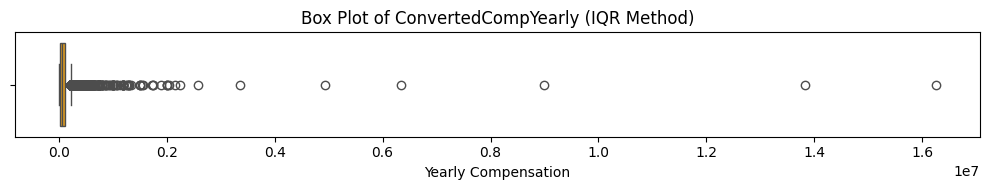

In [5]:
##Write your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Drop missing values
comp_data = df['ConvertedCompYearly'].dropna()

# Step 2: Calculate Q1, Q3, and IQR
Q1 = comp_data.quantile(0.25)
Q3 = comp_data.quantile(0.75)
IQR = Q3 - Q1

# Step 3: Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): {Q1:,.2f}")
print(f"Q3 (75th percentile): {Q3:,.2f}")
print(f"IQR: {IQR:,.2f}")
print(f"Lower Bound: {lower_bound:,.2f}")
print(f"Upper Bound: {upper_bound:,.2f}")

# Step 4: Identify outliers
iqr_outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]

# Count of outliers
print(f"\nNumber of outliers detected using IQR: {len(iqr_outliers)}")

plt.figure(figsize=(10, 2))
sns.boxplot(x=comp_data, color='orange')
plt.title('Box Plot of ConvertedCompYearly (IQR Method)')
plt.xlabel('Yearly Compensation')
plt.tight_layout()
plt.show()



<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [6]:
##Write your code here
# Step 1: Drop missing values (if not already done)
comp_data = df['ConvertedCompYearly'].dropna()

# Step 2: Calculate IQR and bounds again (if needed)
Q1 = comp_data.quantile(0.25)
Q3 = comp_data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Create a new DataFrame excluding outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Step 4: Validate the size of the new DataFrame
print(f"Original dataset size: {df.shape}")
print(f"New dataset size (no outliers): {df_no_outliers.shape}")
print(f"Number of rows removed: {df.shape[0] - df_no_outliers.shape[0]}")


Original dataset size: (65437, 114)
New dataset size (no outliers): (22457, 114)
Number of rows removed: 42980


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [ ]:
##Write your code here
# Step 1: Map age ranges to numeric midpoints
age_map = {
    'Under 18': 16,
    '18-24': 21,
    '25-34': 29.5,
    '35-44': 39.5,
    '45-54': 49.5,
    '55-64': 59.5,
    '65 or over': 70
}

# Apply mapping
df['Age_Mapped'] = df['Age'].map(age_map)

# Step 2: Select numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include='number').copy()

# Add the mapped Age column
numeric_cols['Age_Mapped'] = df['Age_Mapped']


<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
